<a href="https://colab.research.google.com/github/vedmara/Python-libraries-for-Data-Sience/blob/main/Cluster_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
custsales = pd.read_csv("/content/drive/MyDrive/Springboard_Python/Customer data (1).csv")
custsales.head()

,Cust_Id,City,age,MonthlyIncome,MinBal,MaxBal,Age with Bank
0,10015,Mumbai,27,12880,2742,11425,1
1,10016,Pune,25,11612,2982,12370,1
2,10017,Mumbai,28,15614,3510,14144,1
3,10018,Mumbai,29,19278,4088,10179,1
4,10019,Nashik,27,15281,4134,10051,1


In [19]:
custsales_cl = custsales.drop(columns=['Cust_Id', 'City'])
custsales_cl.head()

,age,MonthlyIncome,MinBal,MaxBal,Age with Bank
0,27,12880,2742,11425,1
1,25,11612,2982,12370,1
2,28,15614,3510,14144,1
3,29,19278,4088,10179,1
4,27,15281,4134,10051,1


In [20]:
scaler = StandardScaler()
custsales_scaled = scaler.fit_transform(custsales_cl)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(custsales_scaled)
labels = kmeans.labels_

In [22]:
custsales_cl['Cluster'] = labels
cluster_means = custsales_cl.groupby('Cluster').mean()

In [23]:
print(cluster_means)

               age  MonthlyIncome        MinBal        MaxBal  Age with Bank
Cluster                                                                     
0        54.967785   82430.545458  39981.618076  54980.393918       6.499173
1        37.451547   42471.369115  15995.790198  30039.130848       3.502184
2        27.011201   12499.414498   3744.162650  12547.469577       1.000333


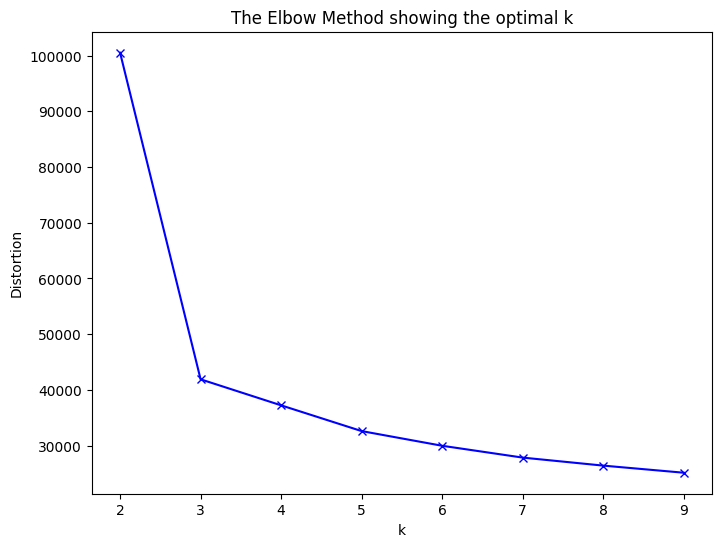

In [24]:
distortions = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeanModel.fit(custsales_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

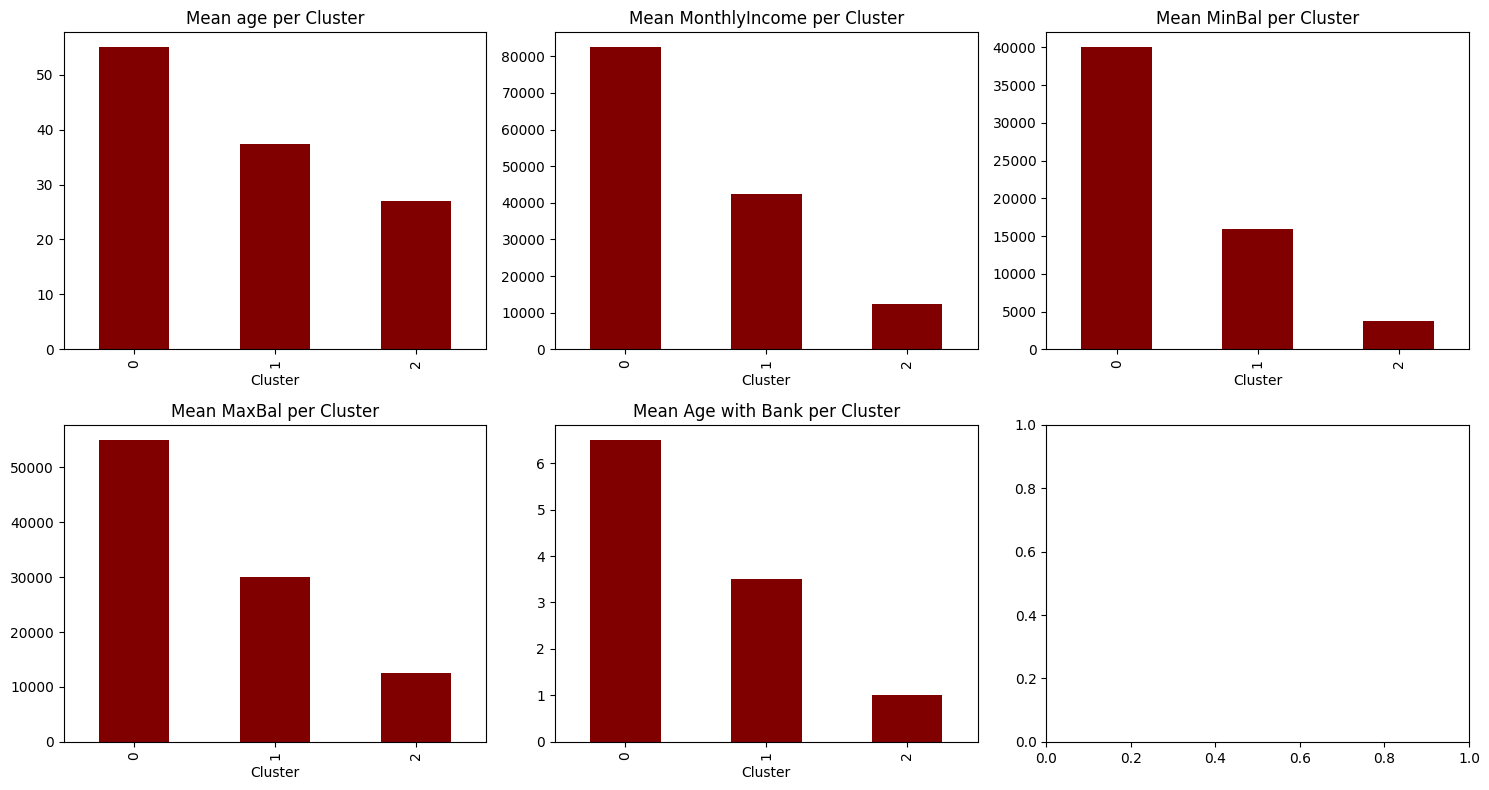

In [25]:
col_list = ['age', 'MonthlyIncome', 'MinBal', 'MaxBal', 'Age with Bank']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axe = axes.ravel()

for i, col in enumerate(col_list):
    cluster_means[col].plot(kind='bar', ax=axe[i], color='maroon')
    axe[i].set_title(f'Mean {col} per Cluster')

plt.tight_layout()
plt.show()